---
# **Lab Report 01**
## **Name   : Muhammad Ehtisham Saleem**
## **Reg No : B22F1242AI108**
## **Lab : Artificial Neural Network**
## **Submitted To : Mam Ammara Irfan**
## **Course Instructor : Dr Arshad Iqbal**
---

---



# **Introduction**
> In this lab task, I focused on developing a spam detection system using Support Vector Machines (SVM). The dataset consisted of labeled emails classified as "spam" or "ham." I started by preprocessing the data, cleaning the text, and applying TF-IDF for feature extraction.

> Next, I trained and evaluated SVM models with different kernels (linear, RBF, and polynomial) to determine the best-performing model. I also used GridSearchCV for hyperparameter tuning to optimize each model’s performance.

>This lab helped me enhance my understanding of preprocessing, model evaluation, and tuning techniques for improving machine learning models in practical applications like email spam detection.



---


## **Step 1: Import Necessary Libraries**



In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import GridSearchCV


## **Explanation:**
* I import necessary libraries for data processing, text analysis, model training, and evaluation.
* pandas is used for data manipulation, nltk for text processing, and scikit-learn for machine learning tasks.
* seaborn and matplotlib help with visualization. wordcloud is for generating word clouds.

## **Step 2: Load the Dataset**


In [ ]:
# Load dataset
df = pd.read_csv('spam.csv')
df.head()


,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## **Explanation:**

* I load the dataset using pandas.read_csv() to work with the email dataset.
* I use df.head() to view the first few rows of the dataset and understand its structure.

## **Step 3: Check for Missing Values**


In [ ]:
# Check for missing values
print(df.isnull().sum())
# Drop rows with missing values (if any)
df = df.dropna()
print("Missing values handled.")


Label        0
EmailText    0
dtype: int64
Missing values handled.


## **Explanation:**
* I check if there are any missing values in the dataset using isnull().sum().
* If any missing values exist, I drop those rows using dropna() to ensure data integrity.
* Handling missing values is crucial to prevent errors during model training.

## **Step 4: Clean the Text Data**


In [ ]:
import nltk
nltk.download('stopwords')
# Clean the email text by removing special characters, numbers, and extra spaces
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply the cleaning function to the 'EmailText' column
df['CleanedText'] = df['EmailText'].apply(clean_text)

print("Text cleaning complete.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text cleaning complete.


## **Explanation:**
* I define a function clean_text() to clean the email text data.
The function removes special characters and numbers using regular expressions (re.sub).
* I convert the text to lowercase for uniformity and remove common stopwords (e.g., "the", "and") to focus on the meaningful words.
* The cleaned text is saved in a new column CleanedText.

## **Step 5: Visualize the Data**


<ipython-input-24-36c3293fef23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df, palette=['green', 'red'])  # Change colors here


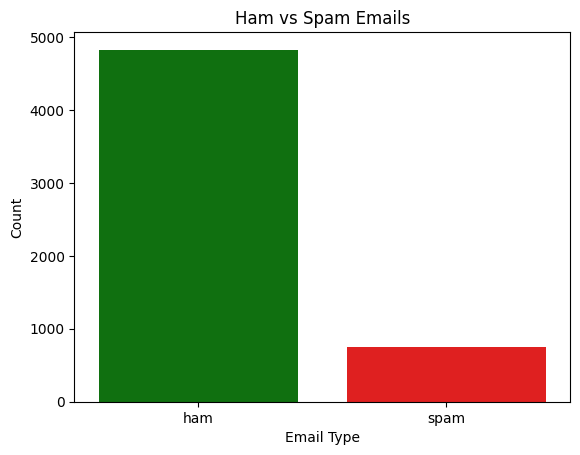

In [ ]:

# Visualize the class distribution (ham vs. spam)
sns.countplot(x='Label', data=df, palette=['green', 'red'])  # Change colors here
plt.title("Ham vs Spam Emails")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

## **Explanation:**
* I use countplot from seaborn to visualize the distribution of the labels (ham vs. spam) in the dataset.
* This helps me understand the class imbalance and how many emails belong to each category.


### **Word Clouds for Ham and Spam Emails:**


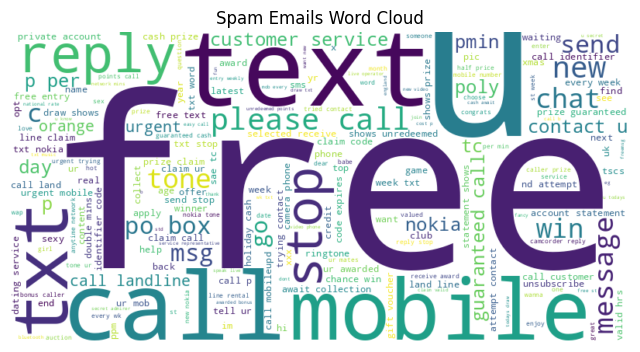

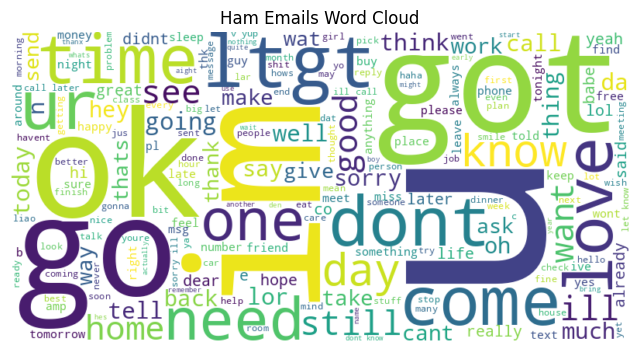

In [ ]:
# Word Cloud for Spam emails
spam_text = " ".join(df[df['Label'] == 'spam']['CleanedText'])
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# Display word cloud for spam
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title("Spam Emails Word Cloud")
plt.axis('off')
plt.show()

# Word Cloud for Ham emails
ham_text = " ".join(df[df['Label'] == 'ham']['CleanedText'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

# Display word cloud for ham
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title("Ham Emails Word Cloud")
plt.axis('off')
plt.show()


## **Explanation:**
* I generate word clouds for both spam and ham emails.
* The text data for each class is extracted and joined into a single string, which is then used to create the word cloud.
* These word clouds visually represent the most frequent words in each category.

## **Step 6: Text Vectorization Using TF-IDF**



In [ ]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)

# Transform the text into numerical vectors
X = tfidf.fit_transform(df['CleanedText']).toarray()
y = df['Label']

print("TF-IDF Transformation Complete.")


TF-IDF Transformation Complete.


## **Explanation:**
* I initialize the TfidfVectorizer with a limit of 3000 features to reduce dimensionality.
* I apply the fit_transform() method to convert the cleaned email text into numerical vectors that can be used by machine learning models.

## **Step 7: Split the Data into Training and Testing Sets**



In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {X_train.shape[0]} samples")
print(f"Testing data size: {X_test.shape[0]} samples")


Training data size: 4457 samples
Testing data size: 1115 samples


## **Explanation:**
* I split the dataset into training (80%) and testing (20%) sets using train_test_split.
* X_train and X_test contain the features, while y_train and y_test contain the labels.
* This separation ensures the model is trained on one set of data and tested on another, simulating real-world performance.


## **Step 8: Train and Evaluate the Model Using Various SVM Kernels**


> ##  **Linear Kernel:**
The linear kernel in SVM is a simple and widely used kernel that works well for linearly separable data. It calculates the similarity between two data points using their dot product. The linear kernel is computationally efficient, easy to interpret, and often used in text classification tasks where the feature space is high-dimensional. However, it may not perform well on non-linear datasets.


In [ ]:
# Train and evaluate the model with a linear kernel
svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train, y_train)

# Predict and evaluate
y_pred_linear = svc_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"Linear Kernel Accuracy: {accuracy_linear * 100:.2f}%")


Linear Kernel Accuracy: 97.85%


## **Explanation:**
* I initialize the SVC model with a linear kernel and train it on the training data.
* I then use the trained model to predict the labels of the test data and calculate the accuracy.
* The accuracy is printed as a percentage.

> ## **RBF Kernel:**

The RBF (Radial Basis Function) kernel is commonly used in SVM for non-linear problems. It transforms the data into a higher-dimensional space, allowing the SVM to find a non-linear decision boundary. This kernel is flexible and can handle complex patterns in data. However, it requires careful tuning of the parameters
𝛾
γ (which controls the influence of data points) and
𝐶
C (which balances margin size and classification error). The RBF kernel is especially useful for tasks where data is not linearly separable.

In [ ]:
# Train and evaluate the model with an RBF kernel
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rbf = svc_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"RBF Kernel Accuracy: {accuracy_rbf * 100:.2f}%")


RBF Kernel Accuracy: 97.49%


## **Explanation:**
* I initialize the SVC model with an RBF kernel and train it on the training data.
* The RBF kernel is suitable for handling non-linear data.
* I evaluate the model and print its accuracy.

> ## **Polynomial Kernel:**
The polynomial kernel in SVM is used for non-linear data, creating decision boundaries based on polynomial functions of the input features. It calculates the similarity between data points as their dot product raised to a specified power, with two key parameters: the degree of the polynomial and a coefficient that controls the impact of the transformation. This kernel is useful for capturing complex patterns in data where the relationship between features is polynomial.

In [ ]:
# Train and evaluate the model with a polynomial kernel
svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train, y_train)

# Predict and evaluate
y_pred_poly = svc_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print(f"Polynomial Kernel Accuracy: {accuracy_poly * 100:.2f}%")


Polynomial Kernel Accuracy: 94.53%


## **Explanation:**
* I train the SVC model with a polynomial kernel.
* The polynomial kernel allows the model to fit more complex decision boundaries.
* I evaluate the accuracy and print it.

## **Step 9: Hyperparameter Tuning Using GridSearchCV**



In [ ]:
# Define parameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print(f"Best Accuracy: {grid_search.best_score_ * 100:.2f}%")


Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Accuracy: 98.16%


## **Explanation:**
* I define a parameter grid (param_grid) for tuning the C (regularization strength) and kernel type.
* GridSearchCV is used to evaluate the combination of hyperparameters and choose the best-performing configuration.
* I print the best parameters and the accuracy of the model with those parameters.

## **Step 10: Evaluate and Compare Model Performance**


In [ ]:
# Compare the accuracy of all models
print(f"Linear Kernel Accuracy: {accuracy_linear * 100:.2f}%")
print(f"RBF Kernel Accuracy: {accuracy_rbf * 100:.2f}%")
print(f"Polynomial Kernel Accuracy: {accuracy_poly * 100:.2f}%")


Linear Kernel Accuracy: 97.85%
RBF Kernel Accuracy: 97.49%
Polynomial Kernel Accuracy: 94.53%


## **Explanation:**
* I compare the accuracy of the three models (Linear, RBF, Polynomial).
* This helps me determine which kernel performs the best for this specific task.


## **Step 11: Predict New Emails (User Input)**



In [ ]:
# Take user input for a new email
new_email = input("Enter the email text: ")
# Clean the new email text
new_email_cleaned = clean_text(new_email)

# Transform the new email using the TF-IDF vectorizer
new_email_vectorized = tfidf.transform([new_email_cleaned]).toarray()

# Predict using the best model
best_model = svc_linear  # Assuming the linear kernel performed the best
prediction = best_model.predict(new_email_vectorized)

# Output the prediction result
if prediction == 'spam':
    print("This email is spam.")
else:
    print("This email is ham.")


Enter the email text: Subject: Unlock Your Exclusive Reward + Team Follow-Up  Hi Sarah Johnson,  I hope you're doing well! I wanted to follow up on a couple of points from our last team meeting and also share an exciting opportunity with you.  Important Work Reminder: As discussed, the updated report for the Q4 marketing strategy is due this Friday. Please ensure it's reviewed and submitted to the team by 3 PM. You can upload it to the shared drive using this link: RealCompanyDriveLink. Let me know if you face any issues.  Exclusive Opportunity for You! Sarah, you've been selected to receive an Exclusive Reward! You’ve earned a spot to claim a $500 Amazon Gift Card by participating in our loyalty program. But act quickly – this offer expires in 24 hours! Claim your reward here: www.fakeofferlink.com.  Upcoming Event: Don’t forget to mark your calendar for next Tuesday’s team webinar on “Effective Leadership Skills.” It’s a great chance to enhance your management capabilities and networ

## **Explanation:**
* I take input from the user for a new email and clean the text.
* The cleaned text is transformed into the same feature space as the training data using the TF-IDF vectorizer.
* I use the best-performing model (based on previous evaluations) to predict whether the email is spam or ham and print the result.



---

